In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

/home/plau/anaconda3/envs/timeGAN/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class LSTMGenerator(nn.Module):
    """Generator with LSTM"""
    def __init__(self, latent_dim, ts_dim, hidden_dim=256, num_layers=1):
        super(LSTMGenerator, self).__init__()

        self.ts_dim = ts_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(latent_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(num_layers*hidden_dim, num_layers*ts_dim)

    def forward(self, x):
        x = x.reshape(x.shape[0], self.num_layers, x.shape[1])
        out, _ = self.lstm(x)
        out = self.linear(out.reshape(x.size(0), x.size(1)*self.hidden_dim))
        out = out.view(x.size(0), self.ts_dim, self.num_layers)
        return out

In [3]:
noise_len = 32
n_samples = 24

In [7]:
generator_LSTM_without_CD_0 = {}
generator_LSTM_MLP_with_CD_0 = {}
generator_baseline_0 = {}

generator_LSTM_without_CD_1 = {}
generator_LSTM_MLP_with_CD_1 = {}
generator_baseline_1 = {}

for n_groups in range(1,6):
    generator_LSTM_without_CD_0[n_groups] = {}
    # generator_LSTM_without_CD_1[n_groups] = {}
    # generator_LSTM_MLP_with_CD_0[n_groups] = {}
    # generator_LSTM_MLP_with_CD_1[n_groups] = {}
    # generator_baseline_0[n_groups] = LSTMGenerator(noise_len, n_samples, num_layers=n_groups)
    # generator_baseline_1[n_groups] = LSTMGenerator(noise_len, n_samples, num_layers=n_groups)

    for i in range(n_groups):
        generator_LSTM_without_CD_0[n_groups][i] = LSTMGenerator(noise_len, n_samples)
        # generator_LSTM_without_CD_1[n_groups][i] = LSTMGenerator(noise_len, n_samples)
        # generator_LSTM_MLP_with_CD_0[n_groups][i] = LSTMGenerator(noise_len, n_samples)
        # generator_LSTM_MLP_with_CD_1[n_groups][i] = LSTMGenerator(noise_len, n_samples)

In [8]:
for n_groups in range(1,6):
    for i in range(n_groups):
            # Without CD 0
        generator_LSTM_without_CD_0_temp_dict = torch.load(f'/home/plau/Documents/CityU/AlgoTrade/COSCI-GAN/Results/Models/with_CD/with_CD_LSTM_G_LSTM_D_CD_type_MLP_6_100_0_57_stock_data_24_100_32_24_BCE_gamma_5.0_Glr_0.001_Dlr_0.001_CDlr_0.0001_noiselen_32_Generator_0.pt', map_location=torch.device('cpu'))
        new_generator_LSTM_without_CD_0_temp_dict = deepcopy(generator_LSTM_without_CD_0_temp_dict)
        for key in generator_LSTM_without_CD_0_temp_dict.keys():
            new_generator_LSTM_without_CD_0_temp_dict[key[7:]] = new_generator_LSTM_without_CD_0_temp_dict.pop(key)
        generator_LSTM_without_CD_0[n_groups][i].load_state_dict(new_generator_LSTM_without_CD_0_temp_dict)

        
        
        
        # LSTM

    #     # Without CD 0
    #     generator_LSTM_without_CD_0_temp_dict = torch.load(f'Results/Models/without_CD/without_CD_LSTM_G_LSTM_D_CD_type_MLP_{n_groups}_100_0_50_EEG_Eye_State_ZeroOne_chop_5best_0_500_32_100_BCE_Glr_0.001_Dlr_0.001_CDlr_0.001_Generator_{i}.pt', map_location=torch.device('cpu'))
    #     new_generator_LSTM_without_CD_0_temp_dict = deepcopy(generator_LSTM_without_CD_0_temp_dict)
    #     for key in generator_LSTM_without_CD_0_temp_dict.keys():
    #         new_generator_LSTM_without_CD_0_temp_dict[key[7:]] = new_generator_LSTM_without_CD_0_temp_dict.pop(key)
    #     generator_LSTM_without_CD_0[n_groups][i].load_state_dict(new_generator_LSTM_without_CD_0_temp_dict)

    #     # Without CD 1
    #     generator_LSTM_without_CD_1_temp_dict = torch.load(f'Results/Models/without_CD/without_CD_LSTM_G_LSTM_D_CD_type_MLP_{n_groups}_100_0_50_EEG_Eye_State_ZeroOne_chop_5best_1_500_32_100_BCE_Glr_0.001_Dlr_0.001_CDlr_0.001_Generator_{i}.pt', map_location=torch.device('cpu'))
    #     new_generator_LSTM_without_CD_1_temp_dict = deepcopy(generator_LSTM_without_CD_1_temp_dict)
    #     for key in generator_LSTM_without_CD_1_temp_dict.keys():
    #         new_generator_LSTM_without_CD_1_temp_dict[key[7:]] = new_generator_LSTM_without_CD_1_temp_dict.pop(key)
    #     generator_LSTM_without_CD_1[n_groups][i].load_state_dict(new_generator_LSTM_without_CD_1_temp_dict)

    #     # LSTM MLP
        
    #     # With CD 0
    #     generator_LSTM_MLP_with_CD_0_temp_dict = torch.load(f'Results/Models/with_CD/with_CD_LSTM_G_LSTM_D_CD_type_MLP_{n_groups}_100_0_50_EEG_Eye_State_ZeroOne_chop_5best_0_500_32_100_BCE_Glr_0.001_Dlr_0.001_CDlr_0.001_Generator_{i}.pt', map_location=torch.device('cpu'))
    #     new_generator_LSTM_MLP_with_CD_0_temp_dict = deepcopy(generator_LSTM_MLP_with_CD_0_temp_dict)
    #     for key in generator_LSTM_MLP_with_CD_0_temp_dict.keys():
    #         new_generator_LSTM_MLP_with_CD_0_temp_dict[key[7:]] = new_generator_LSTM_MLP_with_CD_0_temp_dict.pop(key)
    #     generator_LSTM_MLP_with_CD_0[n_groups][i].load_state_dict(new_generator_LSTM_MLP_with_CD_0_temp_dict)

    #     # With CD 1
    #     generator_LSTM_MLP_with_CD_1_temp_dict = torch.load(f'Results/Models/with_CD/with_CD_LSTM_G_LSTM_D_CD_type_MLP_{n_groups}_100_0_50_EEG_Eye_State_ZeroOne_chop_5best_1_500_32_100_BCE_Glr_0.001_Dlr_0.001_CDlr_0.001_Generator_{i}.pt', map_location=torch.device('cpu'))
    #     new_generator_LSTM_MLP_with_CD_1_temp_dict = deepcopy(generator_LSTM_MLP_with_CD_1_temp_dict)
    #     for key in generator_LSTM_MLP_with_CD_1_temp_dict.keys():
    #         new_generator_LSTM_MLP_with_CD_1_temp_dict[key[7:]] = new_generator_LSTM_MLP_with_CD_1_temp_dict.pop(key)
    #     generator_LSTM_MLP_with_CD_1[n_groups][i].load_state_dict(new_generator_LSTM_MLP_with_CD_1_temp_dict)

    # # Baseline 0
    # generator_baseline_0_temp_dict = torch.load(f'Results/Models/baseline/baseline_{n_groups}_100_0_50_EEG_Eye_State_ZeroOne_chop_5best_0_500_32_100_BCE_Glr_0.001_Dlr_0.001_Generator.pt', map_location=torch.device('cpu'))
    # new_generator_baseline_0_temp_dict = deepcopy(generator_baseline_0_temp_dict)
    # for key in generator_baseline_0_temp_dict.keys():
    #     new_generator_baseline_0_temp_dict[key[7:]] = new_generator_baseline_0_temp_dict.pop(key)
    # generator_baseline_0[n_groups].load_state_dict(new_generator_baseline_0_temp_dict)

    # # Baseline 1
    # generator_baseline_1_temp_dict = torch.load(f'Results/Models/baseline/baseline_{n_groups}_100_0_50_EEG_Eye_State_ZeroOne_chop_5best_1_500_32_100_BCE_Glr_0.001_Dlr_0.001_Generator.pt', map_location=torch.device('cpu'))
    # new_generator_baseline_1_temp_dict = deepcopy(generator_baseline_1_temp_dict)
    # for key in generator_baseline_1_temp_dict.keys():
    #     new_generator_baseline_1_temp_dict[key[7:]] = new_generator_baseline_1_temp_dict.pop(key)
    # generator_baseline_1[n_groups].load_state_dict(new_generator_baseline_1_temp_dict)

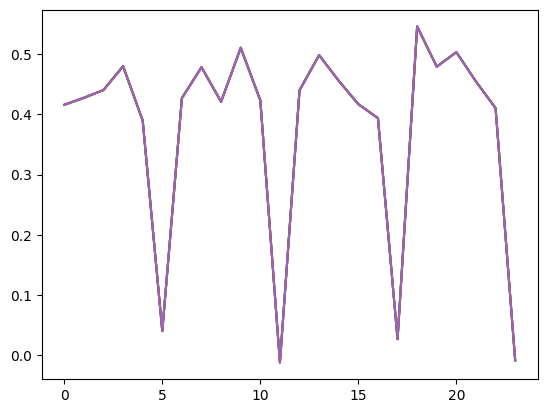

In [9]:
new_noise = torch.randn((16384, noise_len)).float()

generated_samples_LSTM_without_CD_0 = {}


for n_groups in range(1, 6):
    noise_for_baseline = torch.randn((16384, noise_len, n_groups)).float()
    generated_samples_LSTM_without_CD_0[n_groups] = {}
    

    for i in range(n_groups):
        generated_samples_LSTM_without_CD_0[n_groups][i] = generator_LSTM_without_CD_0[n_groups][i](new_noise).detach().cpu().numpy()
       
    
plt.figure()
plt.plot(generated_samples_LSTM_without_CD_0[5][0][0, :], label='Signal 0')
plt.plot(generated_samples_LSTM_without_CD_0[5][1][0, :], label='Signal 1')
plt.plot(generated_samples_LSTM_without_CD_0[5][2][0, :], label='Signal 2')
plt.plot(generated_samples_LSTM_without_CD_0[5][3][0, :], label='Signal 3')
plt.plot(generated_samples_LSTM_without_CD_0[5][4][0, :], label='Signal 4')
plt.show()



In [10]:
# create dataframe of generated samples
generated_samples_LSTM_without_CD_0_df = {}

for n_groups in range(1, 6):
    generated_samples_LSTM_without_CD_0_df[n_groups] = {}
    

    for i in range(n_groups):
        generated_samples_LSTM_without_CD_0_df[n_groups][i] = pd.DataFrame(generated_samples_LSTM_without_CD_0[n_groups][i].squeeze())
        

In [8]:
# save generated samples to csv

for n_groups in range(1, 6):
    pd.concat([generated for generated in generated_samples_LSTM_without_CD_0_df[n_groups].values()], axis=1, ignore_index=True).to_csv(f'../../GeneratedData/generated_samples_LSTM_without_CD_0_{n_groups}.csv', index=False)
   